<a href="https://colab.research.google.com/github/SAI-CHANDRA415/MLINTERNSHIP/blob/master/Copy_of_MLINTERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.IMPORTING DIRECTORIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


1.1 Loading the data

In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [5]:
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
dataset.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


1.2 Checking the types of data and basic summary statistics

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
dataset.shape

(5000, 14)

2.Cleaning of the data

In [10]:
dataset[dataset['Experience']<0]['Experience'].count()

52

2.1 As the Customer ID and Experience are not so useful for the prediction, it would be better drop down the colomns from the dataset.

In [11]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
#dropping the 'ID' and 'Experience' columns from the dataset

dataset.drop(['ID','Experience'] , axis=1 ,inplace=True)

In [13]:
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
#Dropping the Online column as it is irrelavent for predicting a person buy a new loan.
dataset.drop(['Online'],axis=1,inplace=True)

In [15]:
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1


# 3.EDA

# 3.1

In [16]:
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
CreditCard              2
dtype: int64

# 3.2

In [17]:
dataset[dataset['Mortgage']==0]['Mortgage'].count()

3462

# 3.3

In [18]:
dataset[dataset['CCAvg']==0]['CCAvg'].count()

106

# 3.4

In [19]:
dataset['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [20]:
dataset['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [21]:
dataset['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [22]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [23]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

# 3.5
# UNIVARIATE ANALYSIS

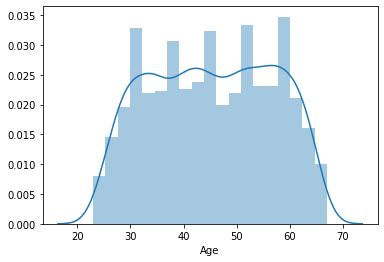

In [24]:
sns.distplot(dataset['Age'])

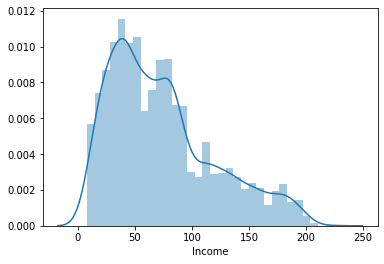

In [25]:
sns.distplot(dataset['Income'])

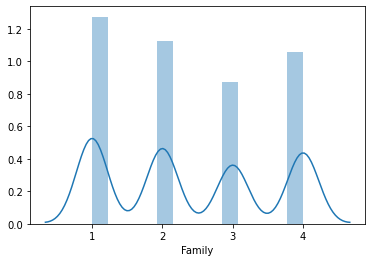

In [26]:
sns.distplot(dataset['Family'])

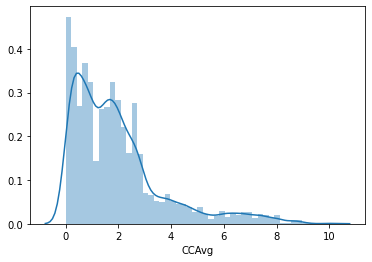

In [27]:
sns.distplot(dataset['CCAvg'])

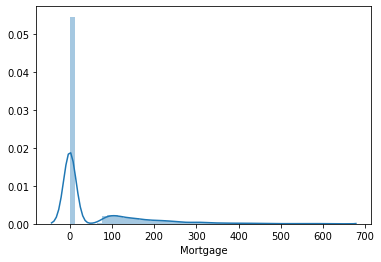

In [28]:
sns.distplot(dataset['Mortgage'])

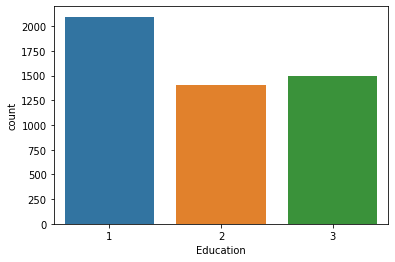

In [29]:
sns.countplot(dataset['Education'])

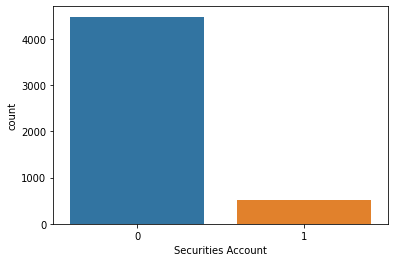

In [30]:
sns.countplot(dataset['Securities Account'])

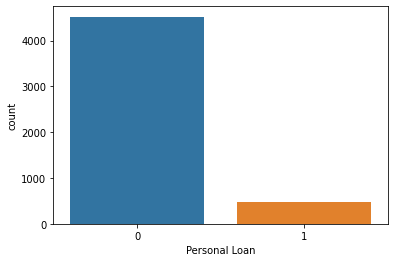

In [31]:
sns.countplot(dataset['Personal Loan'])

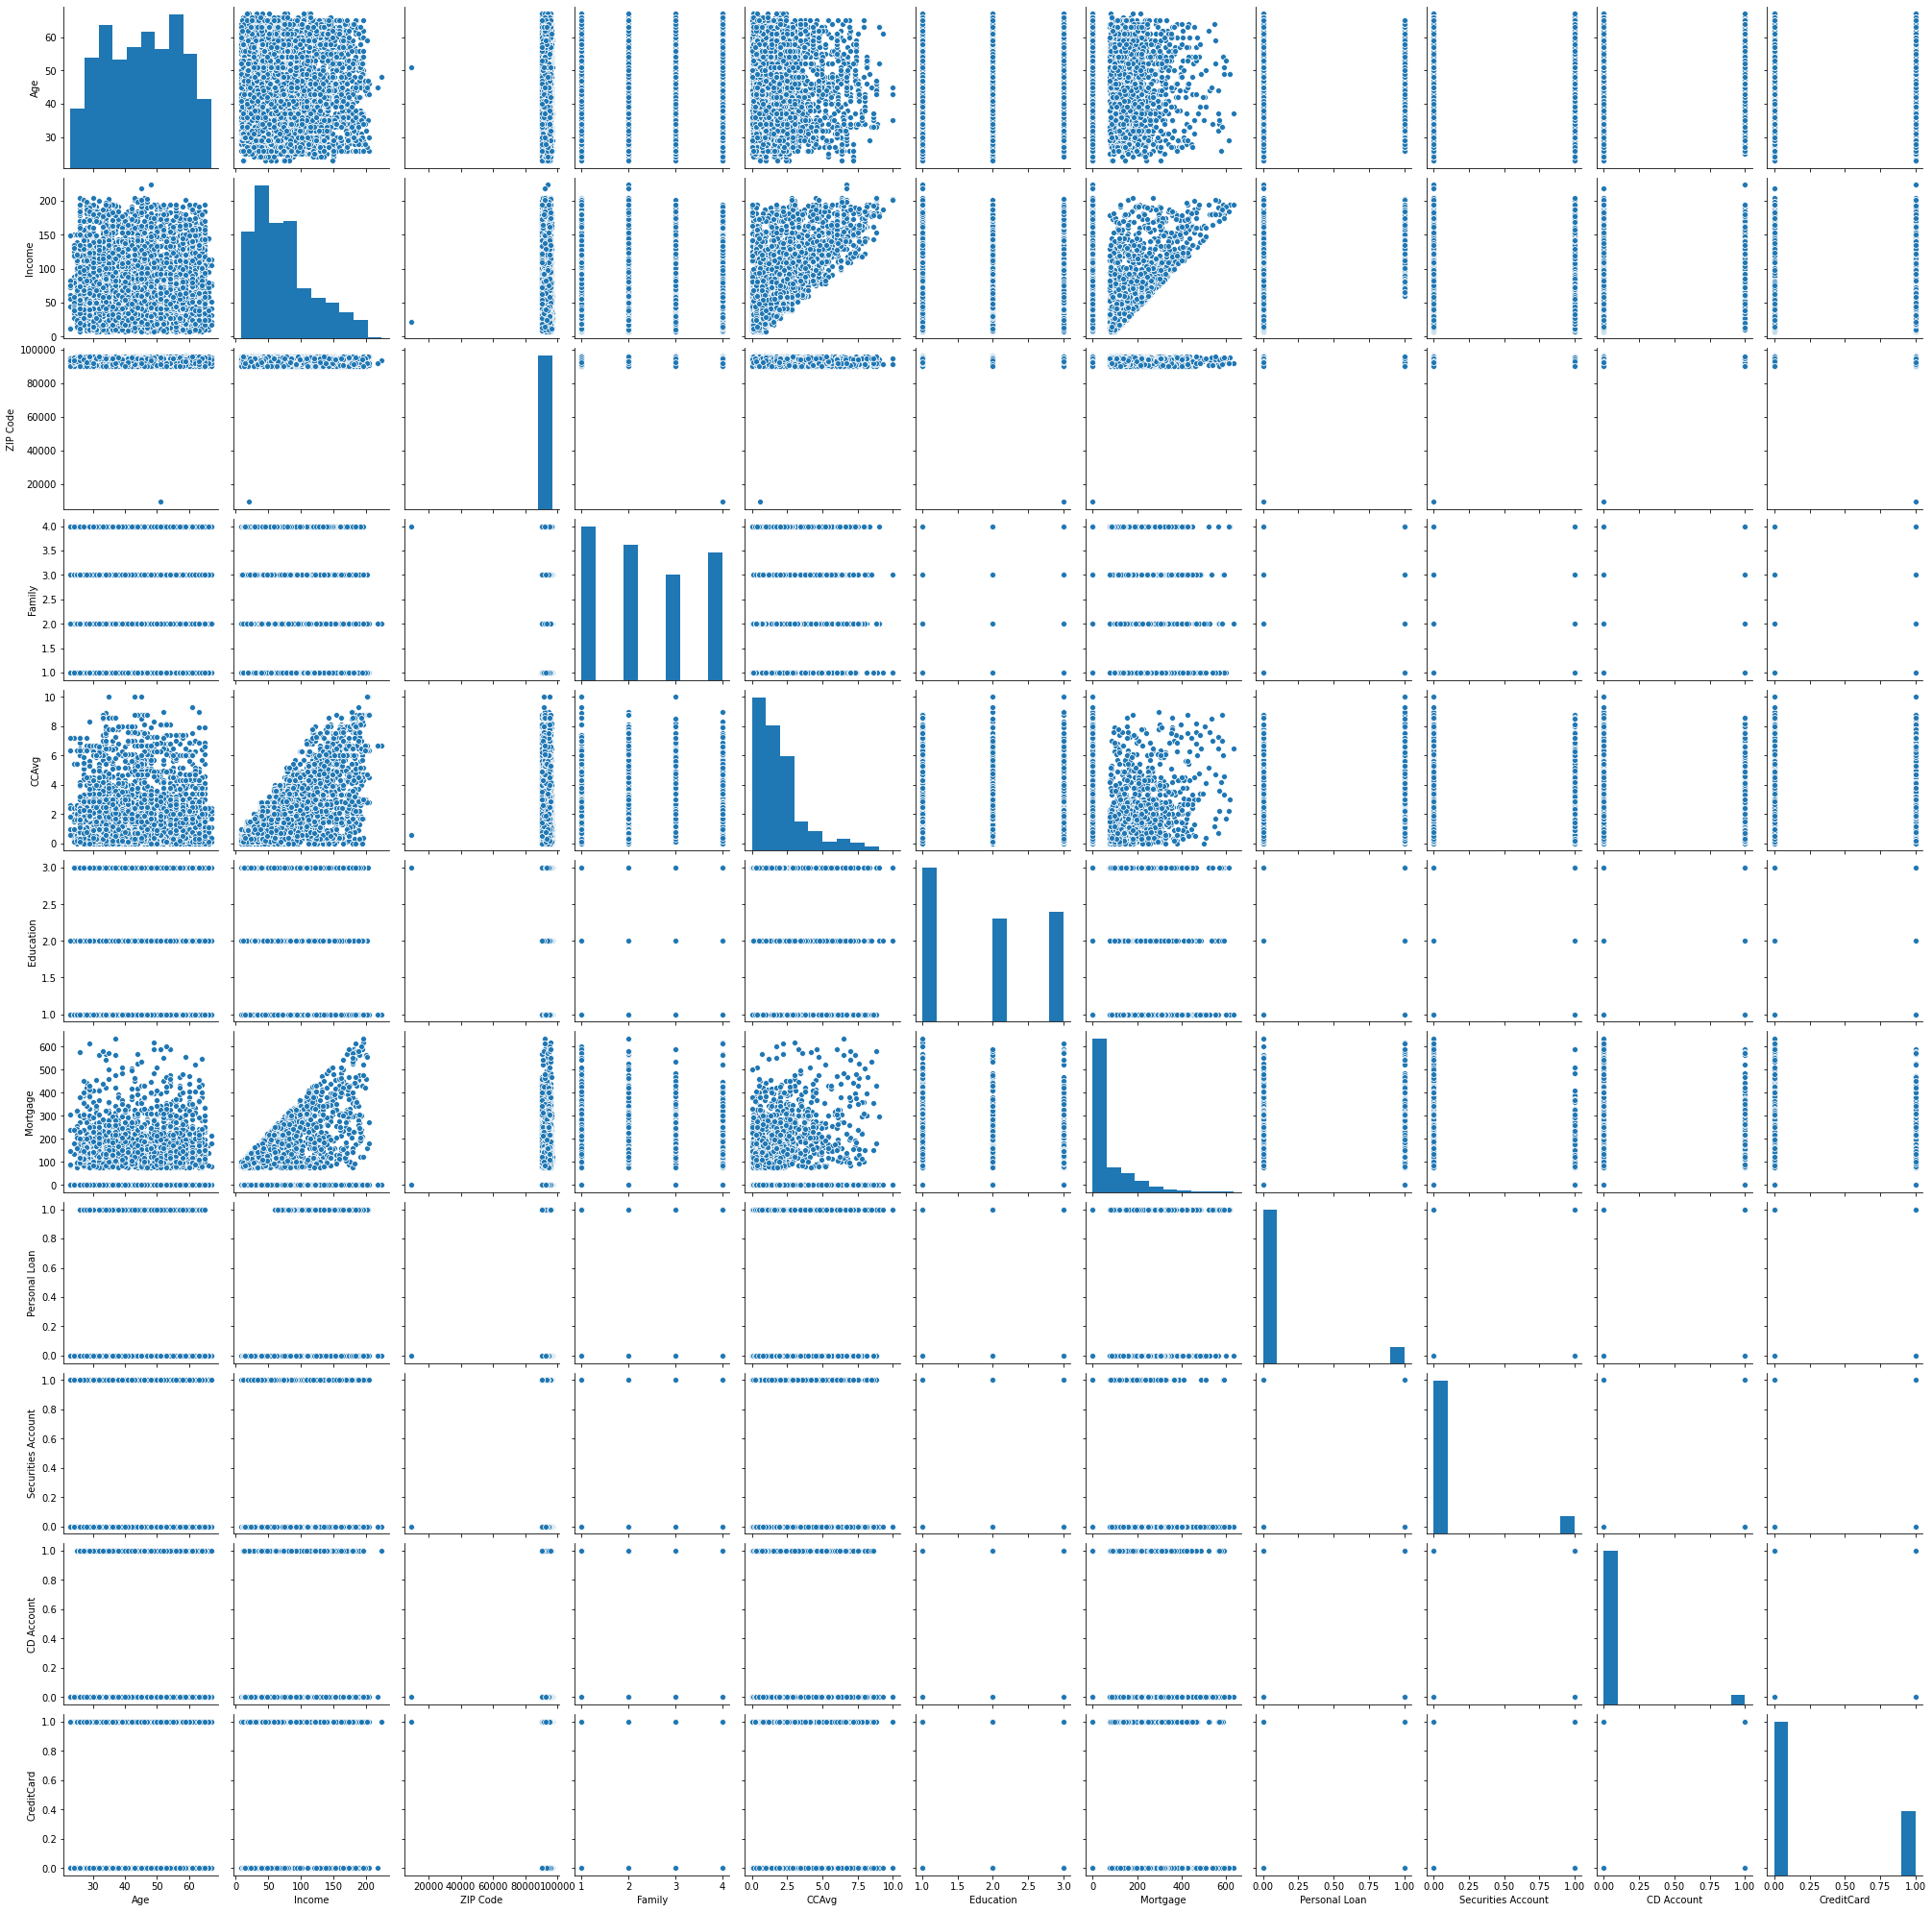

In [32]:
sns.pairplot(dataset)

# MULTIVARIATE ANALYSIS

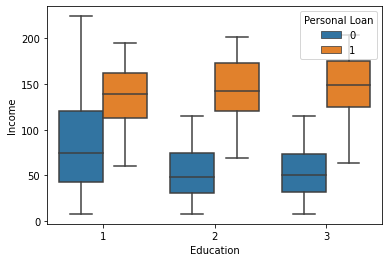

In [33]:
sns.boxplot(x=dataset['Education'],y=dataset['Income'],hue=dataset['Personal Loan'])

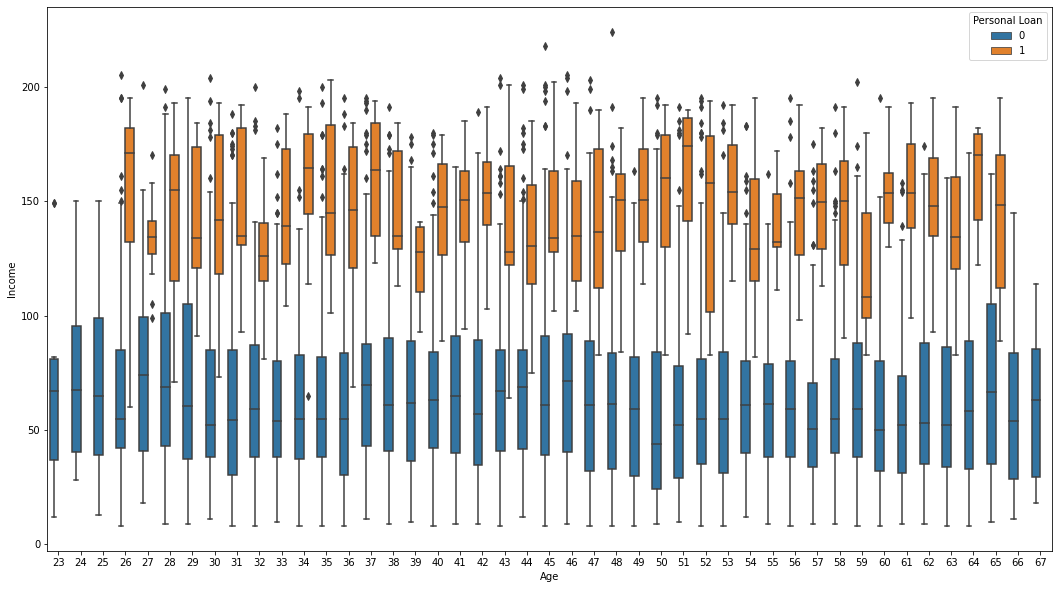

In [35]:
plt.figure(figsize=(18,10))
sns.boxplot(x=dataset['Age'],y=dataset['Income'],hue=dataset['Personal Loan'])

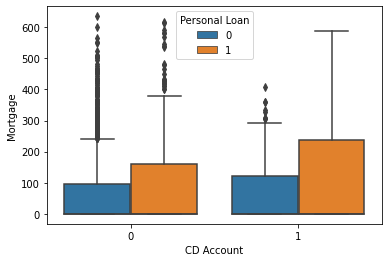

In [36]:
sns.boxplot(x=dataset['CD Account'],y=dataset['Mortgage'],hue=dataset['Personal Loan'])

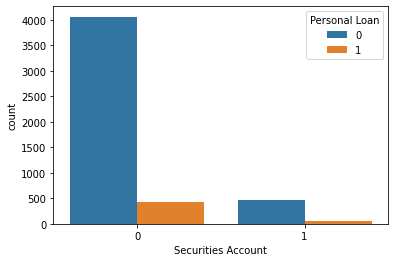

In [37]:
sns.countplot(x=dataset['Securities Account'],hue=dataset['Personal Loan'])

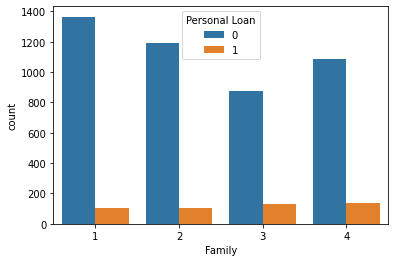

In [38]:
sns.countplot(x=dataset['Family'],hue=dataset['Personal Loan'])

# CORRELATION CHART OF THE DATA

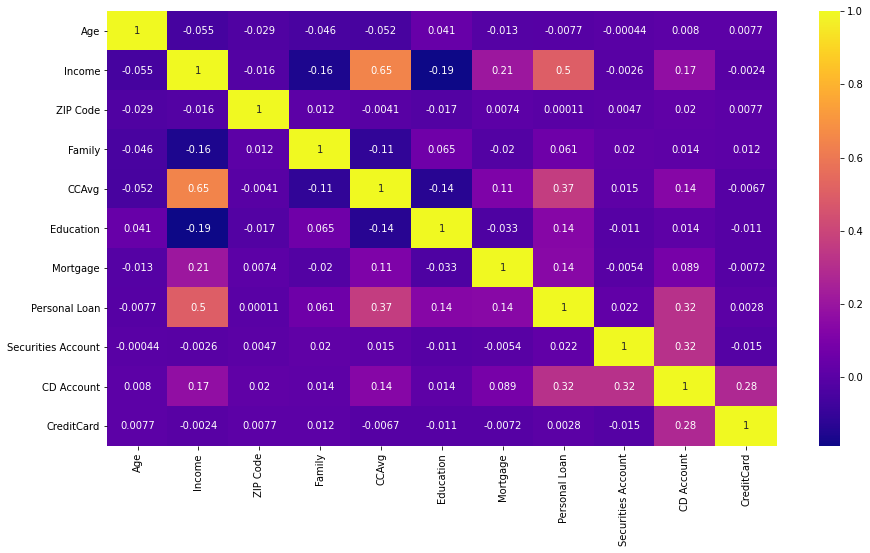

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),cmap = 'plasma',annot=True).figsize=(15,10)

# 4.TRANSFORMATIONS

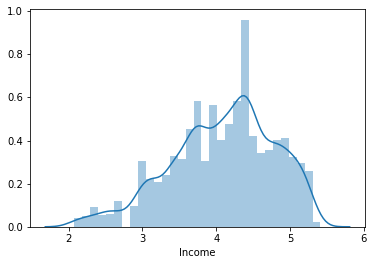

In [40]:
pts = np.log(dataset['Income'])
sns.distplot(pts)

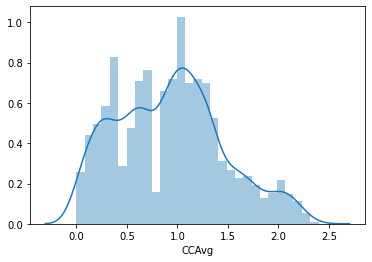

In [41]:
pts = np.log(dataset['CCAvg']+1)

sns.distplot(pts)